In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [38]:
data_ecl = pd.read_csv('LD2011_2014.txt', parse_dates=True, sep=';', decimal=',', index_col=0)
data_ecl = data_ecl.resample('1h', closed='right').sum()
data_ecl = data_ecl.loc[:, data_ecl.cumsum(axis=0).iloc[8920] != 0]  # filter out instances with missing values
data_ecl.index = data_ecl.index.rename('date')
data_ecl = data_ecl['2012':]
data_ecl.to_csv('electricity.csv')

In [39]:
df = pd.read_csv("electricity.csv")

In [40]:
df

,date,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
0,2012-01-01 00:00:00,16.497462,91.038407,309.296264,552.845528,289.024390,1392.857143,34.482759,1117.845118,291.958042,...,876.096491,482.512491,103900.0,6042.194093,6636.363636,62.581486,51.492101,2096.575944,243.739566,2854.105572
1,2012-01-01 01:00:00,19.035533,92.460882,309.296264,548.780488,280.487805,1357.142857,27.699265,1104.377104,269.230769,...,808.114035,451.106353,95500.0,4388.185654,6613.636364,63.885267,42.129901,2200.175593,245.409015,2823.313783
2,2012-01-01 02:00:00,16.497462,91.749644,309.296264,546.747967,265.853659,1145.833333,26.568683,959.595960,255.244755,...,813.596491,410.421128,96600.0,4278.481013,6568.181818,63.885267,38.619075,1996.488147,203.672788,2756.598240
3,2012-01-01 03:00:00,19.035533,88.193457,309.296264,408.536585,201.219512,767.857143,19.219898,801.346801,166.083916,...,797.149123,259.814418,93400.0,4168.776371,6318.181818,73.011734,38.619075,1320.456541,188.647746,2724.340176
4,2012-01-01 04:00:00,17.766497,87.482219,309.296264,327.235772,180.487805,622.023810,14.132278,720.538721,183.566434,...,804.824561,295.503212,90300.0,4130.801688,6272.727273,62.581486,35.108250,1314.310799,190.317195,2741.202346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2014-12-31 19:00:00,7.614213,110.241821,6.950478,821.138211,385.365854,1532.738095,47.484454,1380.471380,412.587413,...,1832.236842,1501.784440,163700.0,8776.371308,9568.181818,284.224250,19.894675,1840.210711,160.267112,2764.662757
26300,2014-12-31 20:00:00,8.883249,97.439545,6.950478,713.414634,359.756098,1324.404762,45.223290,1188.552189,351.398601,...,1172.149123,1317.630264,157900.0,6586.497890,8340.909091,298.565841,16.383850,1357.330992,525.876461,2722.873900
26301,2014-12-31 21:00:00,10.152284,90.327169,6.950478,650.406504,351.219512,1267.857143,46.353872,1074.074074,293.706294,...,884.868421,1309.064954,154200.0,6590.717300,5704.545455,294.654498,17.554125,2047.410009,661.101836,2647.360704
26302,2014-12-31 22:00:00,8.883249,88.193457,6.950478,630.081301,339.024390,1247.023810,45.223290,1026.936027,283.216783,...,828.947368,1178.443969,133100.0,6514.767932,5454.545455,220.338983,30.427150,2796.312555,784.641068,2709.677419


In [41]:
df.isna().sum()

date      0
MT_001    0
MT_002    0
MT_003    0
MT_004    0
         ..
MT_365    0
MT_366    0
MT_367    0
MT_368    0
MT_369    0
Length: 322, dtype: int64

In [138]:
model = KMeans(n_clusters=2)

points = df.iloc[:,1:]

model.fit(points)

# Tentukan label untuk cluster
labels = model.labels_

labels

array([1, 1, 1, ..., 1, 1, 1])

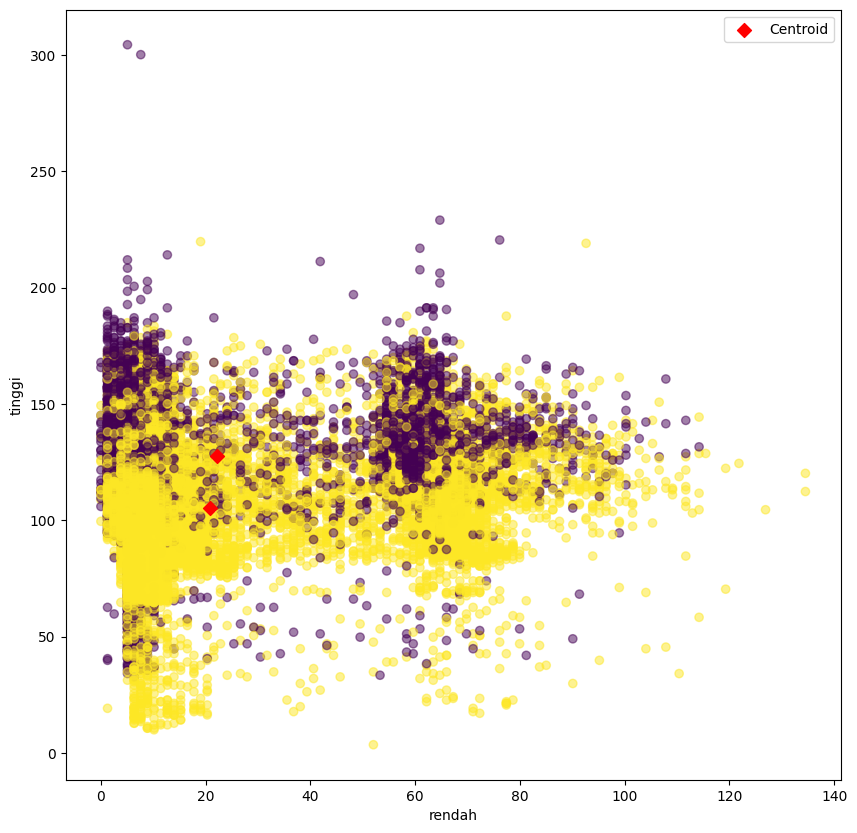

In [141]:
xs = points.iloc[:,0]
ys = points.iloc[:,1]
# Menampung koordinat dari tiap centroid
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# visualisasi cluster
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,color="r",label="Centroid")
plt.xlabel("rendah")
plt.ylabel("tinggi")
plt.legend()
plt.show()

In [140]:
test = df.iloc[:,1:]

test

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
0,16.497462,91.038407,309.296264,552.845528,289.024390,1392.857143,34.482759,1117.845118,291.958042,351.612903,...,876.096491,482.512491,103900.0,6042.194093,6636.363636,62.581486,51.492101,2096.575944,243.739566,2854.105572
1,19.035533,92.460882,309.296264,548.780488,280.487805,1357.142857,27.699265,1104.377104,269.230769,329.032258,...,808.114035,451.106353,95500.0,4388.185654,6613.636364,63.885267,42.129901,2200.175593,245.409015,2823.313783
2,16.497462,91.749644,309.296264,546.747967,265.853659,1145.833333,26.568683,959.595960,255.244755,288.172043,...,813.596491,410.421128,96600.0,4278.481013,6568.181818,63.885267,38.619075,1996.488147,203.672788,2756.598240
3,19.035533,88.193457,309.296264,408.536585,201.219512,767.857143,19.219898,801.346801,166.083916,184.946237,...,797.149123,259.814418,93400.0,4168.776371,6318.181818,73.011734,38.619075,1320.456541,188.647746,2724.340176
4,17.766497,87.482219,309.296264,327.235772,180.487805,622.023810,14.132278,720.538721,183.566434,169.892473,...,804.824561,295.503212,90300.0,4130.801688,6272.727273,62.581486,35.108250,1314.310799,190.317195,2741.202346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,7.614213,110.241821,6.950478,821.138211,385.365854,1532.738095,47.484454,1380.471380,412.587413,343.010753,...,1832.236842,1501.784440,163700.0,8776.371308,9568.181818,284.224250,19.894675,1840.210711,160.267112,2764.662757
26300,8.883249,97.439545,6.950478,713.414634,359.756098,1324.404762,45.223290,1188.552189,351.398601,313.978495,...,1172.149123,1317.630264,157900.0,6586.497890,8340.909091,298.565841,16.383850,1357.330992,525.876461,2722.873900
26301,10.152284,90.327169,6.950478,650.406504,351.219512,1267.857143,46.353872,1074.074074,293.706294,276.344086,...,884.868421,1309.064954,154200.0,6590.717300,5704.545455,294.654498,17.554125,2047.410009,661.101836,2647.360704
26302,8.883249,88.193457,6.950478,630.081301,339.024390,1247.023810,45.223290,1026.936027,283.216783,292.473118,...,828.947368,1178.443969,133100.0,6514.767932,5454.545455,220.338983,30.427150,2796.312555,784.641068,2709.677419
